In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.keras.backend.clear_session()


In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
# Normalize the image data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Reshape the data to fit the model input requirements
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))


In [7]:
# Convert labels to one-hot vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [9]:
# Model Development
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Model Training
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.5103 - accuracy: 0.8115 - val_loss: 0.3709 - val_accuracy: 0.8619
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3312 - accuracy: 0.8788 - val_loss: 0.3491 - val_accuracy: 0.8729
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2843 - accuracy: 0.8952 - val_loss: 0.2914 - val_accuracy: 0.8941
Epoch 4/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2530 - accuracy: 0.9065 - val_loss: 0.3059 - val_accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2304 - accuracy: 0.9140 - val_loss: 0.3258 - val_accuracy: 0.8813
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2125 - accuracy: 0.9204 - val_loss: 0.2631 - val_accuracy: 0.9048
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1932 - accuracy: 0.9280 - val_loss: 0.2585 -

In [12]:
# Evaluation and Analysis
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 3s 8ms/step - loss: 0.2792 - accuracy: 0.9033
Test accuracy: 0.9032999873161316


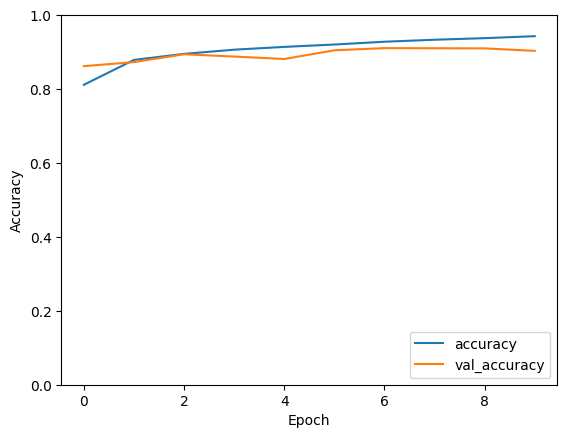

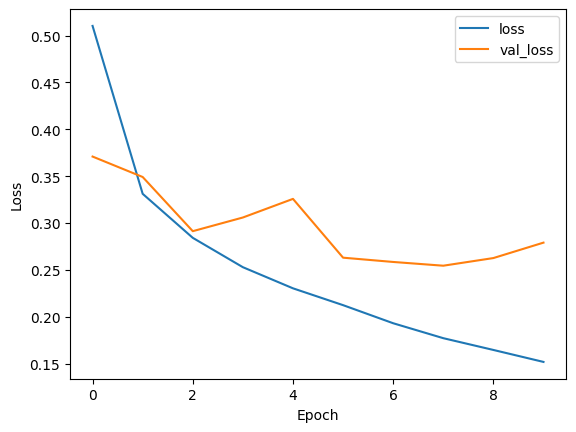

In [13]:
# Plot training and validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()